In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math


In [3]:
train =pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submit = pd.read_csv('submit.csv')

In [4]:
train['gender'].fillna('female', inplace=True)

In [5]:
test['gender'].fillna('female', inplace=True)

In [6]:
train['race/ethnicity'].fillna('group A', inplace=True)

In [7]:
test['race/ethnicity'].fillna('group A', inplace=True)

In [8]:
train['parental level of education'].fillna("master's degree", inplace=True)

In [9]:
test['parental level of education'].fillna("master's degree", inplace=True)

In [10]:
train['lunch'].fillna("free/reduced", inplace=True)

In [11]:
test['lunch'].fillna("free/reduced", inplace=True)

In [12]:
train['test preparation course'].fillna('completed', inplace=True)

In [13]:
test['test preparation course'].fillna('completed', inplace=True)

In [14]:
train['parental_job_status'].fillna('unemployed', inplace=True)

In [15]:
test['parental_job_status'].fillna('unemployed', inplace=True)

In [16]:
train['parental_wealth_classification'].fillna('wealthy', inplace=True)

In [17]:
 test['parental_wealth_classification'].fillna('wealthy', inplace=True)

In [18]:
train.head()

,student_id,gender,race/ethnicity,parental level of education,lunch,test preparation course,score,parental_job_status,parental_wealth_classification
0,1014,female,group D,high school,standard,completed,88,employed,poor
1,1650,female,group A,some high school,free/reduced,completed,34,unemployed,middle class
2,717,female,group C,some high school,standard,none,59,employed,middle class
3,258,female,group D,master's degree,standard,none,68,employed,poor
4,1312,male,group D,some college,standard,completed,74,employed,poor


In [19]:
test.head()

,student_id,gender,race/ethnicity,parental level of education,lunch,test preparation course,parental_job_status,parental_wealth_classification
0,810,female,group A,some college,standard,none,employed,middle class
1,1609,female,group A,associate's degree,free/reduced,completed,employed,poor
2,15,female,group A,some high school,free/reduced,none,unemployed,middle class
3,134,male,group D,master's degree,standard,none,employed,wealthy
4,846,male,group C,associate's degree,standard,completed,employed,poor


In [20]:
train['gender'] = train['gender'].map({'male':0, 'female':1})
train['race/ethnicity'] = train['race/ethnicity'].map({'group A':0, 'group B':1, 'group C':2, 'group D':3, 'group E':4})
train['parental level of education'] = train['parental level of education'].map({'some college':0, "master's degree":1, 'high school':2, 'some high school':3, "associate's degree":4, "bachelor's degree":5})
train['lunch'] = train['lunch'].map({'standard':0, 'free/reduced':1})
train['test preparation course'] = train['test preparation course'].map({'none':0, 'completed':1})
train['parental_job_status'] = train['parental_job_status'].map({'employed':0, 'unemployed':1})
train['parental_wealth_classification'] = train['parental_wealth_classification'].map({'middle class':0, 'poor':1, 'wealthy':2})

In [21]:
test['gender'] = test['gender'].map({'male':0, 'female':1})
test['race/ethnicity'] = test['race/ethnicity'].map({'group A':0, 'group B':1, 'group C':2, 'group D':3, 'group E':4})
test['parental level of education'] = test['parental level of education'].map({'some college':0, "master's degree":1, 'high school':2, 'some high school':3, "associate's degree":4, "bachelor's degree":5})
test['lunch'] = test['lunch'].map({'standard':0, 'free/reduced':1})
test['test preparation course'] = test['test preparation course'].map({'none':0, 'completed':1})
test['parental_job_status'] = test['parental_job_status'].map({'employed':0, 'unemployed':1})
test['parental_wealth_classification'] = test['parental_wealth_classification'].map({'middle class':0, 'poor':1, 'wealthy':2})

In [22]:
train.head()

,student_id,gender,race/ethnicity,parental level of education,lunch,test preparation course,score,parental_job_status,parental_wealth_classification
0,1014,1,3,2,0,1,88,0,1
1,1650,1,0,3,1,1,34,1,0
2,717,1,2,3,0,0,59,0,0
3,258,1,3,1,0,0,68,0,1
4,1312,0,3,0,0,1,74,0,1


In [23]:
test.head()

,student_id,gender,race/ethnicity,parental level of education,lunch,test preparation course,parental_job_status,parental_wealth_classification
0,810,1,0,0,0,0,0,0
1,1609,1,0,4,1,1,0,1
2,15,1,0,3,1,0,1,0
3,134,0,3,1,0,0,0,2
4,846,0,2,4,0,1,0,1


In [36]:
my_train = train.drop('score', axis=1)

In [27]:
X = train.drop('score', axis=1)
y = train['score']

In [26]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [47]:
X_train.columns

Index(['student_id', 'race/ethnicity', 'parental level of education', 'lunch',
       'parental_job_status', 'parental_wealth_classification'],
      dtype='object')

In [24]:
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor

In [25]:
rfc_model = RandomForestRegressor(n_estimators=500, max_depth=None, min_samples_split=10, max_leaf_nodes=50)

In [48]:
rfc_model.fit(X_train, y_train)

RandomForestRegressor(max_leaf_nodes=50, min_samples_split=10, n_estimators=500)

In [49]:
pred = rfc_model.predict(X_test)

In [50]:
score = mean_squared_error(y_test, pred)

In [51]:
math.sqrt(score)

7.2177775701403

# plotting feature importance

In [39]:
def plot_feature_importance(importance, names, model_type):
    
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    data = {'feature_names': feature_names, 'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)
    
    plt.figure(figsize=(10,8))
    
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    
    plt.title(model_type + ' feature importance')
    plt.xlabel('feature importance')
    plt.ylabel('feature names')

In [34]:
len(train.columns)

9

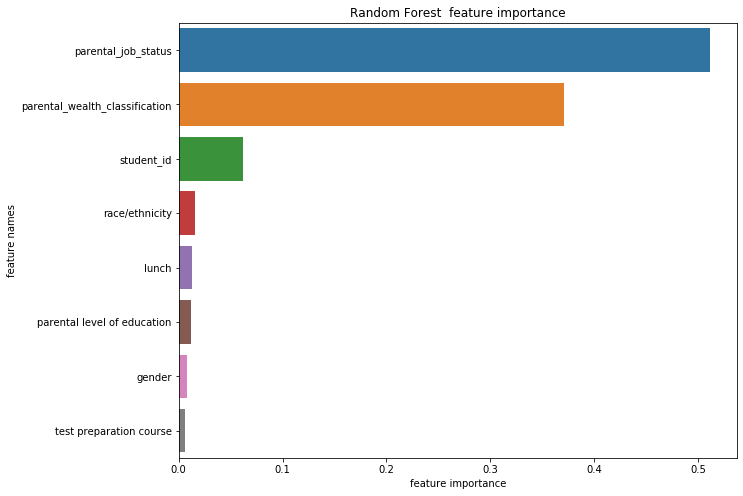

In [40]:
plot_feature_importance(rfc_model.feature_importances_, my_train.columns, 'Random Forest ')

In [44]:
X = train.drop(['score', 'test preparation course', 'gender'], axis=1)
y = train['score']

In [45]:
my_test = test.drop(['test preparation course', 'gender'], axis=1)